In [28]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

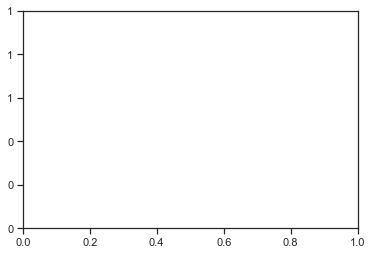

In [31]:
# Define a custom tick formatting function
def format_thousands_with_space(x, pos):
    return f'{x:,.0f}'.replace(",", " ")

# Apply the custom formatting function to the default y-axis formatter
plt.rcParams['axes.formatter.use_locale'] = True
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_thousands_with_space))

In [8]:
tab = pd.read_csv('./DoE/DoE - Results v3.csv', delimiter=';', decimal=',')
tab

,OrdemPad,OrdemEns,N,cv,rho,p,algorithm,Cost,SL,Smax,Smin
0,470,1,5,0.25,0.7,0.00,NM,152993.61,89.88,"[397.2654856684437, 575.7171241719723, 535.845...","[221.6896732987889, 463.7362156871882, 441.474..."
1,395,2,20,0.25,0.9,0.15,GA,185110.00,98.29,"[16.21, 145.28, 369.86, 666.66, 717.44, 478.14...","[14.685170030467107, 86.30906598073835, 314.33..."
2,376,3,20,0.25,0.8,0.00,ACO,174332.05,98.12,"[790.0, 670.0, 90.0, 570.0, 160.0, 345.0, 190....","[255.0, 285.0, 5.0, 470.0, 135.0, 190.0, 75.0,..."
3,312,4,10,0.50,0.8,0.15,ACO,124730.28,98.07,"[455.0, 230.0, 855.0, 465.0, 330.0, 115.0, 285...","[240.0, 65.0, 735.0, 330.0, 285.0, 30.0, 240.0..."
4,968,5,10,0.50,0.9,0.05,ACO,108410.72,98.80,"[425.0, 850.0, 480.0, 630.0, 310.0, 175.0, 410...","[240.0, 330.0, 375.0, 395.0, 130.0, 170.0, 90...."
...,...,...,...,...,...,...,...,...,...,...,...
967,10,968,20,0.10,0.7,0.15,NM,144925.74,99.92,"[502.9426776991907, 413.00830686708946, 632.82...","[235.6929195759084, 248.3576008484995, 391.361..."
968,524,969,5,0.50,0.8,0.05,ACO,93635.97,97.62,"[360.0, 390.0, 455.0, 195.0, 705.0]","[355.0, 380.0, 445.0, 145.0, 600.0]"
969,732,970,20,0.50,0.7,0.15,ACO,187280.09,98.97,"[525.0, 395.0, 255.0, 850.0, 110.0, 220.0, 330...","[270.0, 245.0, 165.0, 225.0, 70.0, 205.0, 75.0..."
970,533,971,5,0.50,0.9,0.05,RD,75840.23,99.94,"[795.7622507107035, 472.98306458537655, 643.94...","[554.6826976836765, 413.46864332318927, 615.90..."


In [9]:
TIC = tab['Cost']
alg = pd.Categorical(tab['algorithm'])
n = pd.Categorical(tab['N'])
cv = pd.Categorical(tab['cv'])
rho = pd.Categorical(tab['rho'])
p = pd.Categorical(tab['p'])

# Create a formula for the ANOVA model
formula = 'TIC ~ n * cv * rho * p * alg'

# Fit the ANOVA model
model = ols(formula, data=tab).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    TIC   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     59.39
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          4.25e-320
Time:                        10:28:47   Log-Likelihood:                -10649.
No. Observations:                 972   AIC:                         2.149e+04
Df Residuals:                     876   BIC:                         2.196e+04
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [13]:
# show anova table
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
n,5.436743e+11,2.0,1276.143005,2.838260e-260
alg,4.392250e+10,3.0,68.731584,6.407067e-40
n:alg,1.244003e+10,6.0,9.733311,2.136711e-10
cv,5.096650e+09,1.0,23.926287,1.190860e-06
n:cv,2.366477e+10,2.0,55.547277,1.939382e-23
cv:alg,9.383979e+08,3.0,1.468440,2.216835e-01
n:cv:alg,1.503023e+08,6.0,0.117599,9.943405e-01
rho,2.398642e+11,1.0,1126.045533,2.120056e-159
n:rho,2.917650e+11,2.0,684.847379,8.417457e-180
rho:alg,1.978260e+09,3.0,3.095656,2.622443e-02


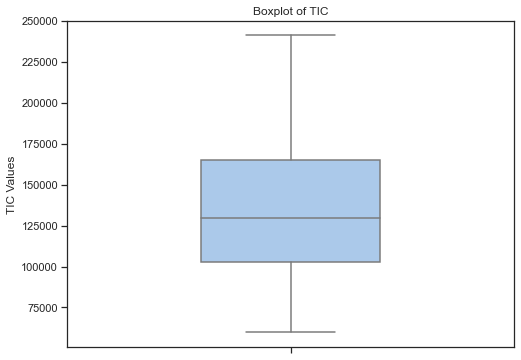

In [32]:
# Create a boxplot with seaborn
sns.set_style("ticks")
sns.color_palette("Paired", 9)

plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.boxplot(y=TIC,  width=0.4)  # Customize colors and width


plt.title('Boxplot of TIC')
plt.ylabel('TIC Values')
plt.show()